In [1]:
#The following file paths are all absolute paths. You can replace them with relative paths at runtime, and the files are located in their respective folders.
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import gym
import matplotlib.pyplot as plt
import random
import argparse
import time
from collections import OrderedDict
from copy import copy
# import Learn_Knonlinear as lka
import scipy
import scipy.linalg
from scipy.integrate import odeint
from tqdm import tqdm, trange
import sys
import os
# os.chdir(r'/media/serena/study/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/')
os.chdir(r'D:/Vscode_works/python_Vscode/mamba/Nonlinear_LSPN/')
sys.path.append("utility_LSPN/")
sys.path.append("LSPN_compare/sizeNN_learnmodel_train")
sys.path.append("utility_LSPN/")
# from LSPN_test import LSPN_Mamba
from Utility import data_collecter
os.environ['KMP_DUPLICATE_LIB_OK'] = "TRUE"

In [3]:
Methods = ["KNonlinear","KNonlinearRNN","KoopmanU",\
            "KoopmanNonlinearA","KoopmanNonlinear",\
                "KNonlinearmamba"]
Method_names = ["KDNN","KRNN","Koopman-DKUC",\
            "Koopman-DKAC","Koopman-DKN","ISPM(ours)"]

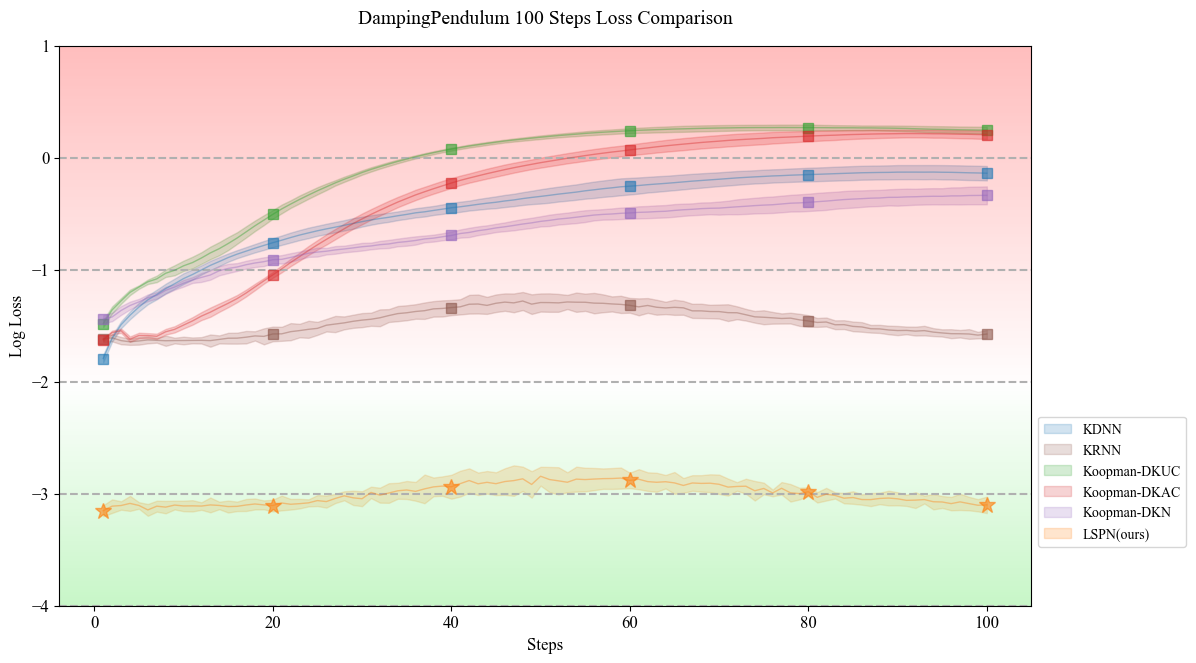

In [8]:
colors = ['#1f77b4', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
font = {'size': 12}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.86
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
plt.figure(figsize=(12, 7))
plt.rc('font', **font)
env_name = "DampingPendulum"
steps = 100
T = []
for t in range(steps):
    T.append(t+1)
T = np.array(T)
for k in [0,1,2,3,4,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    mark_steps = [1, 20, 40, 60, 80, 100]  # 步数位置
    if not k==5:
        markers = ['s', 's', 's', 's', 's', 's']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        plt.plot(step, mean_predictions[step-1], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    plt.plot(T, mean_predictions, color=colors[k],alpha=0.4)
    plt.fill_between(T, mean_predictions - std_predictions, mean_predictions + std_predictions, color=colors[k], alpha=0.2, label=Method_names[k])

num_bands = 100  # 控制渐变条带数量
total_height = 3  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-2 + i * (total_height / num_bands), -2 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 2  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-4 + i * (total_height / num_bands), -4 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

plt.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.35))
plt.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
plt.xlabel("Steps",fontsize=12)
plt.ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
plt.ylim([-4,1])
# plt.yticks([])
plt.title("DampingPendulum {} Steps Loss Comparison".format(steps),fontsize=14)
plt.savefig("DampingPendulum_100_Steps_Compare.png",dpi = 500)

In [ ]:
colors = ['#1f77b4', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
font = {'size': 12}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.86
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
plt.figure(figsize=(12, 5))
plt.rc('font', **font)
env_name = "DampingPendulum"
steps = 10000
T = []
for t in range(steps):
    T.append(t+1)
T = np.array(T)
for k in [0,1,2,3,4,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    mark_steps = [1, 10, 100, 1000, 10000]  # 步数位置
    if not k==5:
        markers = ['s', 's', 's', 's', 's']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        plt.plot(step, mean_predictions[step-1], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    plt.semilogx(T, mean_predictions, color=colors[k],alpha=0.4)
    plt.fill_between(T, mean_predictions - std_predictions, mean_predictions + std_predictions, color=colors[k], alpha=0.2, label=Method_names[k])

num_bands = 100  # 控制渐变条带数量
total_height = 6  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-1 + i * (total_height / num_bands), -1 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 3  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-4 + i * (total_height / num_bands), -4 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

plt.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.35))
plt.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
plt.xlabel("Steps",fontsize=12)
plt.ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
plt.ylim([-4,5])
# plt.yticks([])
plt.title("DampingPendulum {} Steps Loss Comparison".format(steps),fontsize=14)
plt.savefig("DampingPendulum_10000_Steps_Compare.png",dpi = 500)

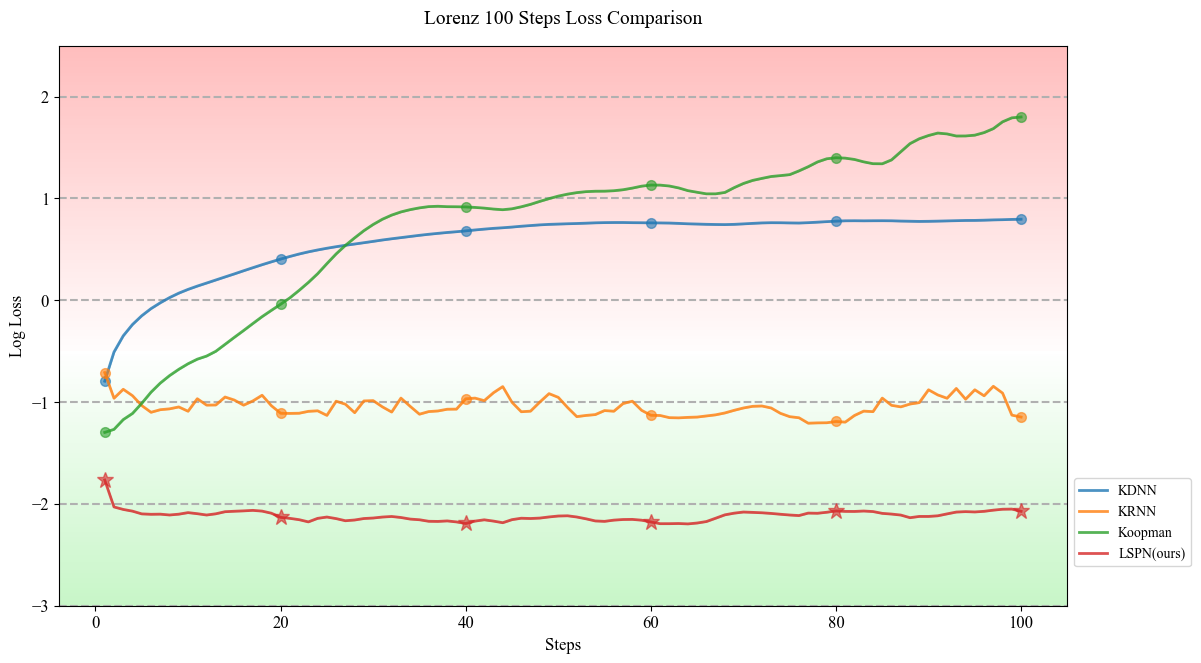

In [9]:
colors = ['#1f77b4', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors =["#1f77b4", "#ff7f0e", "#2ca02c", "", "", "#d62728"]
font = {'size': 12}
Method_names = ["KDNN","KRNN","Koopman","*","*","LSPN(ours)"]
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.89
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
plt.figure(figsize=(12, 7))
plt.rc('font', **font)
env_name = "luorenz"
steps = 101
T = []
for t in range(steps-1):
    T.append(t+1)
T = np.array(T)
for k in [0,1,2,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    mark_steps = [1, 20, 40, 60, 80, 100]  # 步数位置
    if not k==5:
        markers = ['o', 'o', 'o', 'o', 'o', 'o']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        plt.plot(step, mean_predictions[step-1], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    plt.plot(T, mean_predictions, color=colors[k],alpha=0.8, label=Method_names[k])
    plt.fill_between(T, mean_predictions - std_predictions, mean_predictions + std_predictions, color=colors[k], alpha=0.2)

num_bands = 100  # 控制渐变条带数量
total_height = 3  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-0.5 + i * (total_height / num_bands), -0.5 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 2.5  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-3 + i * (total_height / num_bands), -3 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

plt.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.24))
plt.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
plt.xlabel("Steps",fontsize=12)
plt.ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
plt.ylim([-3,2.5])
# plt.yticks([])
plt.title("Lorenz {} Steps Loss Comparison".format(steps-1),fontsize=14)
plt.savefig("Luorenz_100_Steps_Compare.png",dpi = 500)

In [ ]:
colors = ['#1f77b4', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors =["#1f77b4", "#ff7f0e", "#2ca02c", "", "", "#d62728"]
font = {'size': 12}
Method_names = ["KDNN","KRNN","Koopman","*","*","LSPN(ours)"]
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.89
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
plt.figure(figsize=(12, 5))
plt.rc('font', **font)
env_name = "luorenz"
steps = 10001
T = []
for t in range(steps-1):
    T.append(t+1)
T = np.array(T)

for k in [0,1,2,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    indices = np.logspace(0, np.log10(len(mean_predictions)-1), num=200).astype(int)
    mark_steps = [1, 10, 100, 1000, 9999]  # 步数位置
    if not k==5:
        markers = ['o', 'o', 'o', 'o', 'o']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        plt.plot(step, mean_predictions[step], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    plt.semilogx(indices, mean_predictions[indices], color=colors[k],alpha=0.8, label=Method_names[k])
    plt.fill_between(indices, mean_predictions[indices] - std_predictions[indices], mean_predictions[indices] + std_predictions[indices], color=colors[k], alpha=0.2)

num_bands = 100  # 控制渐变条带数量
total_height = 4  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-1 + i * (total_height / num_bands), -1 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 2  # 总高度范围，从-1到5
for i in range(num_bands):
    plt.axhspan(-3 + i * (total_height / num_bands), -3 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

plt.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.24))
plt.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
plt.xlabel("Steps",fontsize=12)
plt.ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
plt.ylim([-3,3])
# plt.yticks([])
plt.title("Lorenz {} Steps Loss Comparison".format(steps-1),fontsize=14)
plt.savefig("Luorenz_10000_Steps_Compare.png",dpi = 500)

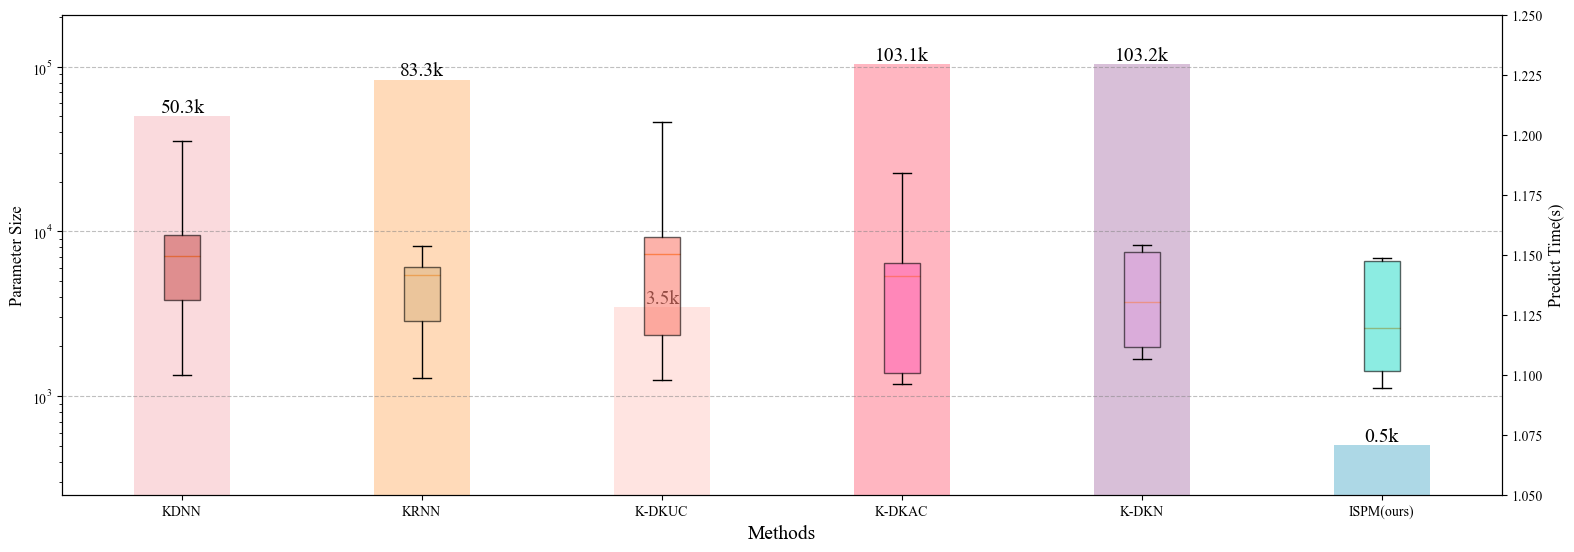

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.95
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例
network_size = [50306, 83330, 3470, 103055, 103183, 504]
time_predict = np.load("DATA/LSPN_compare_drawdata/timedraw_300step_loss.npy")
time_predict = time_predict.reshape(-1, 6)
labels = ["KDNN", "KRNN", "DKUC", "DKAC", "DKN", "LSPN"]

fig, ax1 = plt.subplots(figsize=(16, 6))
peach_blossom_colors = ['#FADADD', '#FFDAB9', 'mistyrose', 'lightpink', '#D8BFD8', 'lightblue']#E0FFFF
corresponding_deep_colors = ['#CD5C5C', '#DEB887', 'salmon', 'hotpink', '#DDA0DD', '#40E0D0']
# 绘制条形图##C71585#FFC0CB#BDB76B
bars = ax1.bar(labels, network_size, color=peach_blossom_colors, width=0.4)
ax1.set_xlabel('Methods',fontsize=14)
ax1.set_ylabel('Parameter Size', color='black',fontsize=12)
ax1.set_yscale('log')
ax1.set_ylim(min(network_size) / 2, max(network_size) * 2)
# 在条形图上显示数据（单位为千）
for bar, value in zip(bars, network_size):
    ax1.text(bar.get_x() + bar.get_width() / 2, value, f'{value/1000:.1f}k', ha='center', va='bottom', color='black',fontsize=14)
plt.gca().set_yticks([1000, 10000, 100000], minor=False)  # 设置主要刻度位置
plt.gca().yaxis.grid(True, which='major', color='gray', linestyle='--', alpha=0.5)  # 主要网格线
# 添加箱线图的坐标轴，共享x轴，调整箱线图大小和宽度
ax2 = ax1.twinx()
box = ax2.boxplot(time_predict, positions=np.arange(len(labels)), patch_artist=True, widths=0.15, boxprops=dict(zorder=10))

# 设置箱线图颜色，保持与之前相同，但减少宽度
for patch, color in zip(box['boxes'], corresponding_deep_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)  # 适度降低透明度，以减少覆盖

# 设置y轴的标签和刻度
ax2.set_ylim(1.05, 1.25)
ax2.set_ylabel('Predict Time(s)', color='black',fontsize=12)
ax2.set_xticklabels(['KDNN', 'KRNN', 'K-DKUC', 'K-DKAC', 'K-DKN', 'ISPM(ours)'],fontsize=16)
plt.savefig("Parameter_Size_Compare.png",dpi = 500)
plt.show()


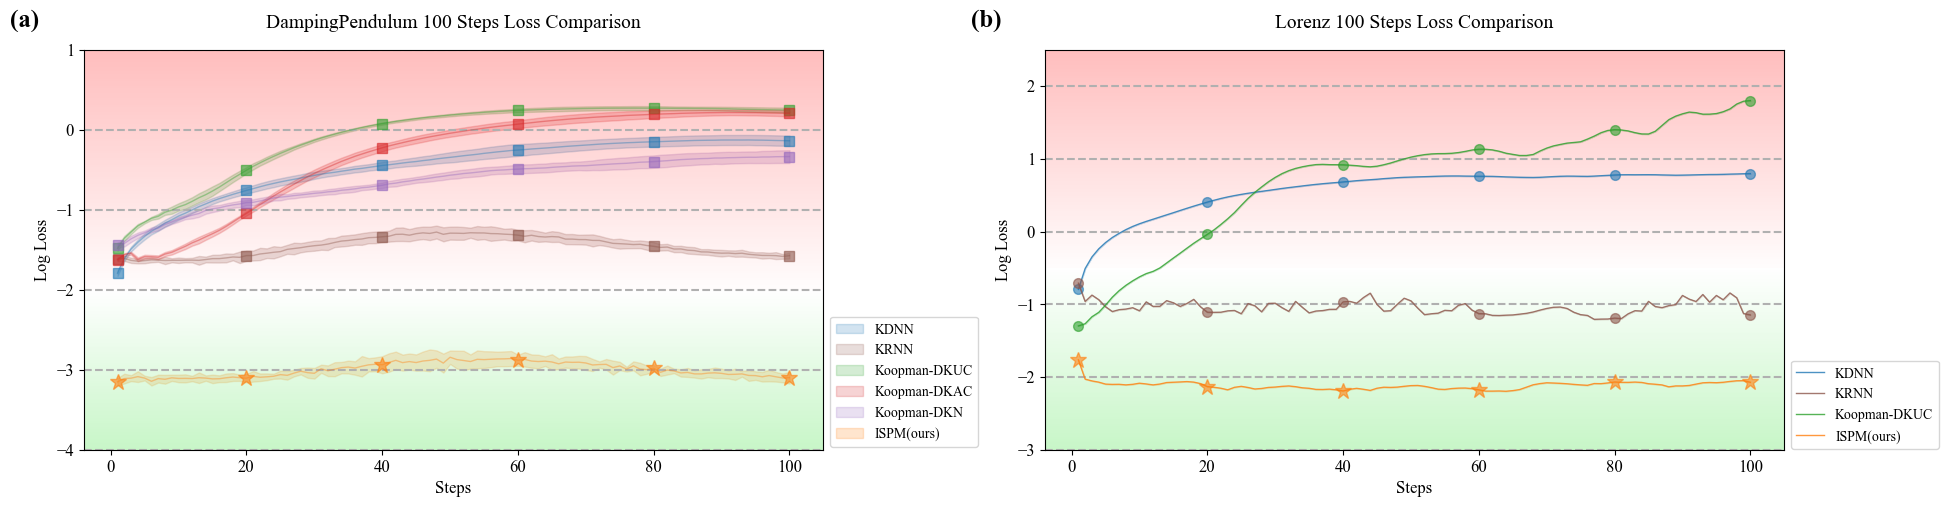

In [4]:
colors = ['#1f77b4', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
font = {'size': 12}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.90
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例

plt.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
env_name = "DampingPendulum"
steps = 100
T = []
for t in range(steps):
    T.append(t+1)
T = np.array(T)
for k in [0,1,2,3,4,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    mark_steps = [1, 20, 40, 60, 80, 100]  # 步数位置
    if not k==5:
        markers = ['s', 's', 's', 's', 's', 's']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        ax1.plot(step, mean_predictions[step-1], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    ax1.plot(T, mean_predictions, color=colors[k],alpha=0.4)
    ax1.fill_between(T, mean_predictions - std_predictions, mean_predictions + std_predictions, color=colors[k], alpha=0.2, label=Method_names[k])

num_bands = 100  # 控制渐变条带数量
total_height = 3  # 总高度范围，从-1到5
for i in range(num_bands):
    ax1.axhspan(-2 + i * (total_height / num_bands), -2 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 2  # 总高度范围，从-1到5
for i in range(num_bands):
    ax1.axhspan(-4 + i * (total_height / num_bands), -4 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

ax1.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.35))
ax1.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
ax1.set_xlabel("Steps",fontsize=12)
ax1.set_ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax1.set_ylim([-4,1])
# plt.yticks([])
ax1.text(-0.10, 1.10, '(a)', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top')
ax1.set_title("DampingPendulum {} Steps Loss Comparison".format(steps),fontsize=14)

env_name = "luorenz"
steps = 101
T = []
for t in range(steps-1):
    T.append(t+1)
T = np.array(T)
for k in [0,1,2,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    mark_steps = [1, 20, 40, 60, 80, 100]  # 步数位置
    if not k==5:
        markers = ['o', 'o', 'o', 'o', 'o', 'o']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        ax2.plot(step, mean_predictions[step-1], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    ax2.plot(T, mean_predictions, color=colors[k],alpha=0.8, label=Method_names[k])
    ax2.fill_between(T, mean_predictions - std_predictions, mean_predictions + std_predictions, color=colors[k], alpha=0.2)

num_bands = 100  # 控制渐变条带数量
total_height = 3  # 总高度范围，从-1到5
for i in range(num_bands):
    ax2.axhspan(-0.5 + i * (total_height / num_bands), -0.5 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 2.5  # 总高度范围，从-1到5
for i in range(num_bands):
    ax2.axhspan(-3 + i * (total_height / num_bands), -3 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

ax2.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.24))
ax2.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
ax2.set_xlabel("Steps",fontsize=12)
ax2.set_ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax2.set_ylim([-3,2.5])
# plt.yticks([])
ax2.text(-0.10, 1.10, '(b)', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top')
ax2.set_title("Lorenz {} Steps Loss Comparison".format(steps-1),fontsize=14)
plt.subplots_adjust(wspace=0.3) 
plt.savefig("100_compare_image.png",dpi = 500)
plt.show()

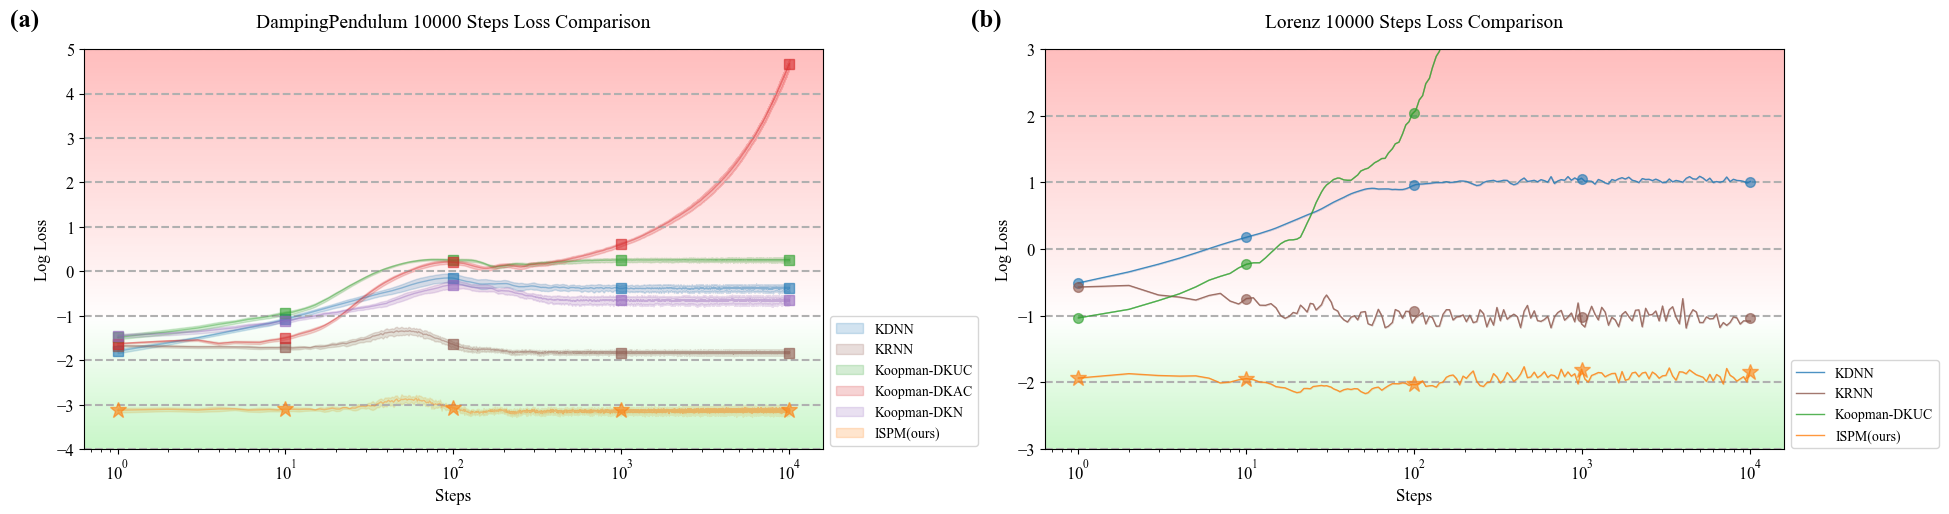

In [5]:
colors = ['#1f77b4', '#8c564b', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
font = {'size': 12}
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams["axes.titlepad"] = 16
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['figure.subplot.left'] = 0.05
plt.rcParams['figure.subplot.right'] = 0.90
plt.rcParams['figure.subplot.bottom'] = 0.1
plt.rcParams['figure.subplot.top'] = 0.9 #子视图大小占视图的比例

plt.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
env_name = "DampingPendulum"
steps = 10000
T = []
for t in range(steps):
    T.append(t+1)
T = np.array(T)
for k in [0,1,2,3,4,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    mark_steps = [1, 10, 100, 1000, 10000]  # 步数位置
    if not k==5:
        markers = ['s', 's', 's', 's', 's']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        ax1.plot(step, mean_predictions[step-1], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    ax1.semilogx(T, mean_predictions, color=colors[k],alpha=0.4)
    ax1.fill_between(T, mean_predictions - std_predictions, mean_predictions + std_predictions, color=colors[k], alpha=0.2, label=Method_names[k])

num_bands = 100  # 控制渐变条带数量
total_height = 6  # 总高度范围，从-1到5
for i in range(num_bands):
    ax1.axhspan(-1 + i * (total_height / num_bands), -1 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 3  # 总高度范围，从-1到5
for i in range(num_bands):
    ax1.axhspan(-4 + i * (total_height / num_bands), -4 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

ax1.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.35))
ax1.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
ax1.set_xlabel("Steps",fontsize=12)
ax1.set_ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax1.set_ylim([-4,5])
# plt.yticks([])
ax1.text(-0.10, 1.10, '(a)', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top')
ax1.set_title("DampingPendulum {} Steps Loss Comparison".format(steps),fontsize=14)

env_name = "luorenz"
steps = 10001
T = []
for t in range(steps-1):
    T.append(t+1)
T = np.array(T)

for k in [0,1,2,5]:#,1,2,3,4,5  
    method = Methods[k]
    pre_loss = np.load("DATA/LSPN_compare_drawdata/log_"+env_name+"{}".format(method)+"_{}.npy".format(steps))
    mean_predictions = np.mean(pre_loss, axis=0)
    std_predictions = np.std(pre_loss, axis=0)
    indices = np.logspace(0, np.log10(len(mean_predictions)-1), num=200).astype(int)
    mark_steps = [1, 10, 100, 1000, 9999]  # 步数位置
    if not k==5:
        markers = ['o', 'o', 'o', 'o', 'o']  # 方形标记
        markersize = 7
    else:
        markers = ['*', '*', '*', '*', '*']  # 五角星标记
        markersize = 12
    for step, marker in zip(mark_steps, markers):
        plt.plot(step, mean_predictions[step], marker=marker, color=colors[k], markersize=markersize, alpha=0.6)
    ax2.semilogx(indices, mean_predictions[indices], color=colors[k],alpha=0.8, label=Method_names[k])
    ax2.fill_between(indices, mean_predictions[indices] - std_predictions[indices], mean_predictions[indices] + std_predictions[indices], color=colors[k], alpha=0.2)

num_bands = 100  # 控制渐变条带数量
total_height = 4  # 总高度范围，从-1到5
for i in range(num_bands):
    ax2.axhspan(-1 + i * (total_height / num_bands), -1 + (i + 1) * (total_height / num_bands), facecolor='red', alpha=(0.25*i + 1) / num_bands)
total_height = 2  # 总高度范围，从-1到5
for i in range(num_bands):
    ax2.axhspan(-3 + i * (total_height / num_bands), -3 + (i + 1) * (total_height / num_bands), facecolor='lightgreen', alpha=0.5*(1-((i + 1) / num_bands)))

ax2.legend(loc='upper left', fontsize = 10, bbox_to_anchor=(1, 0.24))
ax2.grid(True, which='both', linestyle='--', linewidth=1.5, axis='y')#, axis='y'
ax2.set_xlabel("Steps",fontsize=12)
ax2.set_ylabel("Log Loss",fontsize=12)
# plt.xlim([-2,102])
# plt.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
ax2.set_ylim([-3,3])
# plt.yticks([])
ax2.text(-0.10, 1.10, '(b)', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top')
ax2.set_title("Lorenz {} Steps Loss Comparison".format(steps-1),fontsize=14)
plt.subplots_adjust(wspace=0.3) 
plt.savefig("10000_compare_image.png",dpi = 500)
plt.show()

In [4]:
#The following file paths are all absolute paths. You can replace them with relative paths at runtime, and the files are located in their respective folders.
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import gym
import matplotlib.pyplot as plt
import random
import argparse
import time
from collections import OrderedDict
from copy import copy
# import Learn_Knonlinear as lka
import scipy
import scipy.linalg
from scipy.integrate import odeint
from tqdm import tqdm, trange
import sys
import os
print('版本：',scipy.__version__)



pandas版本： 2.1.0+cu118
